In [1]:
#!/usr/bin/env python
from scipy import constants as sp
import os
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from process_data import ReadComsol,PostProcData
import Plotting

# Read data from downloads
file_dbx = os.getcwd() + '/data_postprocess/downloads/comsol_datafiles/Bx_fullData.csv'
file_dby = os.getcwd() + '/data_postprocess/downloads/comsol_datafiles/By_fullData.csv'

rdx = ReadComsol.ReadComsol(file_dbx)
rdy = ReadComsol.ReadComsol(file_dby)

# Read csv file, and get x,y annd dbx/dby data for each
# blocked point in space
bx_x,bx_y,bx_z = rdx.read_full_data()
by_x,by_y,by_z = rdy.read_full_data()
dbx = np.asarray(bx_z).astype(np.float)
dby = np.asarray(by_z).astype(np.float)

# Postprocess data
post = PostProcData.PostProcData()

# Single spin couplinng for each point on mesh grid
g = post.coupling(dbx,dby,theta=0)
hist, edges = post.spin_density(bx_x,bx_y,g) # density

# Calculate Purcell enhancement at each grid point
Q = 10000 # Q factor - for now typed in, but will be found from CST calcs ultimately
purcell = post.purcell_rate(g,Q)
pdens, pedge = post.purcell_density(bx_x,bx_y,purcell) # density

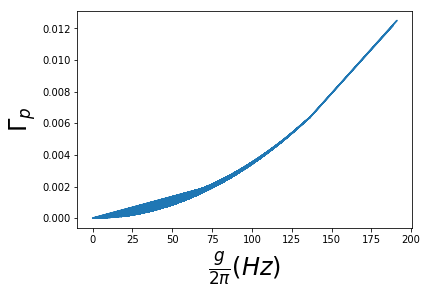

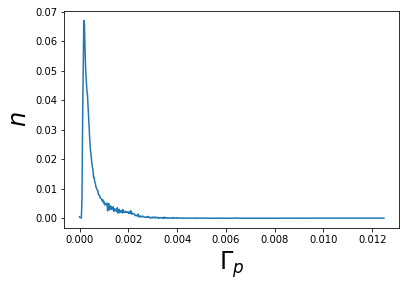

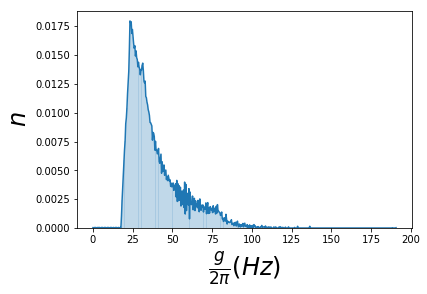

In [2]:
plt.plot(g,purcell)
plt.xlabel('$\\frac{g}{2\pi} (Hz)$',fontsize=24)
plt.ylabel('$\Gamma_{p}$',fontsize=24)
plt.show()

#plt.bar(pedge,height=pdens,alpha=0.15)
plt.plot(pedge,pdens)
plt.xlabel('$\Gamma_{p}$',fontsize=24)
plt.ylabel('$n$',fontsize=24)
plt.show()

plt.bar(edges,height=hist,alpha=0.15)
plt.plot(edges,hist)
plt.xlabel('$\\frac{g}{2\pi} (Hz)$',fontsize=24)
plt.ylabel('$n$',fontsize=24)
plt.show()

In [3]:
theta = np.arange(0,2*np.pi,2*np.pi/10)
g_theta = np.zeros((len(theta),len(g)),dtype=float)

for t in range(len(theta)):
    print(t)
    g_theta[t] = post.coupling(dbx,dby,theta=theta[t])
    print(g_theta)

0
[[ 17.98122397  18.11822457  18.25555656 ...,  18.2560181   18.1201091
   17.98453456]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]]
1
[[ 17.98122397  18.11822457  18.25555656 ...,  18.2560181   18.1201091
   17.98453456]
 [ 17.98122397  18.11822457  18.25555656 ...,  18.2560181   18.1201091
   17.98453456]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.

In [4]:
np.shape(g_theta)

(10, 40401)

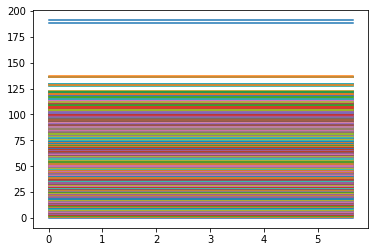

In [7]:
plt.plot(theta,g_theta)
plt.show()

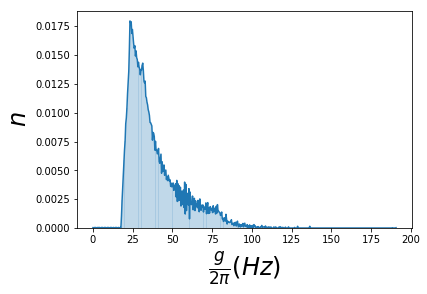

In [2]:
fig, ax = plt.subplots(figsize=(6,4))
plt.bar(edges,height=hist,alpha=0.15)
plt.plot(edges,hist)
plt.xlabel('$\\frac{g}{2\pi} (Hz)$',fontsize=24)
plt.ylabel('$n$',fontsize=24)
plt.savefig(os.getcwd() + 'dens.eps')
plt.show()

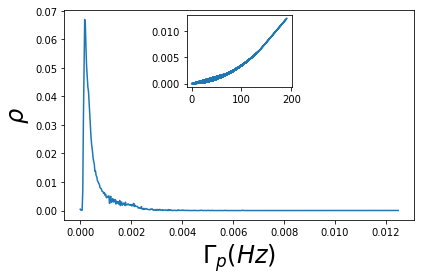

In [19]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig2, ax2 = plt.subplots(figsize=(6,4))
ax2.plot(pedge,pdens)
ax2.set_xlabel('$\Gamma_{p} (Hz)$',fontsize='24')
ax2.set_ylabel('$\\rho$',fontsize='24')
plt.tight_layout()

inset_axes = inset_axes(ax2,
    width="30%",
    height=1.,
    loc=9)
plt.plot(g,purcell)
plt.xlabel('g')
plt.ylabel('$\Gamma_{p}$'')
#plt.savefig(str(os.getcwd() + '/figs/' + 'purcell_density.eps'))
plt.show()